## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

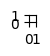

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='--')
plt.rcParams.update({'font.size': 30})

## Parameters

In [3]:
# converge -> coexist
r1=15
r2=11
a11=0.7
a12=0.2
a21=0.2
a22=0.2

SoS_1 = r2 / ( 1 + ( r2 - 1 ) * a12 / a22  )
SoS_2 = r1 / ( 1 + ( r1 - 1 ) * a21 / a11  )
print('SoS_1='+str(SoS_1)+',SoS_2='+str(SoS_2))

SoS_1=1.0,SoS_2=2.9999999999999996


In [4]:
#C12, C21 > 0: coexistence (always coexistence)
# diverge -> extinction
r1=15
r2=11
a11=0.7
a12=0.4
a21=0.1
a22=0.2

SoS_1 = r1 / ( 1 + ( r2 - 1 ) * a12 / a22  )
SoS_2 = r2 / ( 1 + ( r1 - 1 ) * a21 / a11  )
print('SoS_1='+str(SoS_1)+',SoS_2='+str(SoS_2))

SoS_1=0.7142857142857143,SoS_2=3.666666666666666


In [5]:
# test
r1=15
r2=11
a11=0.7
a12=0.1
a21=0.6
a22=0.5

SoS_1 = r1 / ( 1 + ( r2 - 1 ) * a12 / a22  )
SoS_2 = r2 / ( 1 + ( r1 - 1 ) * a21 / a11  )
print('SoS_1='+str(SoS_1)+',SoS_2='+str(SoS_2))

SoS_1=5.0,SoS_2=0.846153846153846


In [6]:
@jit(nopython=True)
def time_simul(y01, y02, r1, r2, a11, a22, a12, a21):
    """Simulate the dynamics of two species over time with adaptive tmax."""
    y1 = np.array([5.0], dtype=np.float64)
    y2 = np.array([5.0], dtype=np.float64)
    stop_run = False
    i = 0
    while not stop_run and i < 10000:
        denom1 = 1 + a11 * y1[i] + a12 * y2[i]
        denom2 = 1 + a22 * y2[i] + a21 * y1[i]
        per_cap1 = r1 / denom1
        per_cap2 = r2 / denom2
        new_y1 = y1[i] * per_cap1
        new_y2 = y2[i] * per_cap2
        y1 = np.append(y1, new_y1)
        y2 = np.append(y2, new_y2)
        if i >= 1:
            if (abs(y1[-1] - y1[-2]) < 1e-6 and abs(y2[-1] - y2[-2]) < 1e-6):
                stop_run = True
        i += 1
    return y1, y2

In [7]:
def plot_dynamics(y01, y02, r1, r2, a11, a12, a21, a22, focal_species=None, fixed_species=None):
    y1, y2 = time_simul(y01, y02, r1, r2, a11, a22, a12, a21)
    tmax = len(y1)
    time = np.linspace(1, tmax, tmax)
    # Plotting N_t
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.plot(time, y1, alpha=0.5, marker="o", linewidth=10, markersize=12, color="blue", label='$N_{1}$')
    ax.plot(time, y2, alpha=0.5, marker="o", linewidth=10, markersize=12, color="orange", label='$N_{2}$')
    ax.set(xlabel='Time', ylabel='$N_{t}$')
    ax.axhline(y=0, color='grey', linestyle='--')
    ax.legend()
    plt.rcParams.update({'font.size': 30})
    plt.tight_layout()
    os.makedirs('img_time_series', exist_ok=True)
    plt.savefig('img_time_series/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'_N01_'+str(y01)+'_N02_'+str(y02)+'.pdf', format='pdf', dpi=300)
    plt.show()

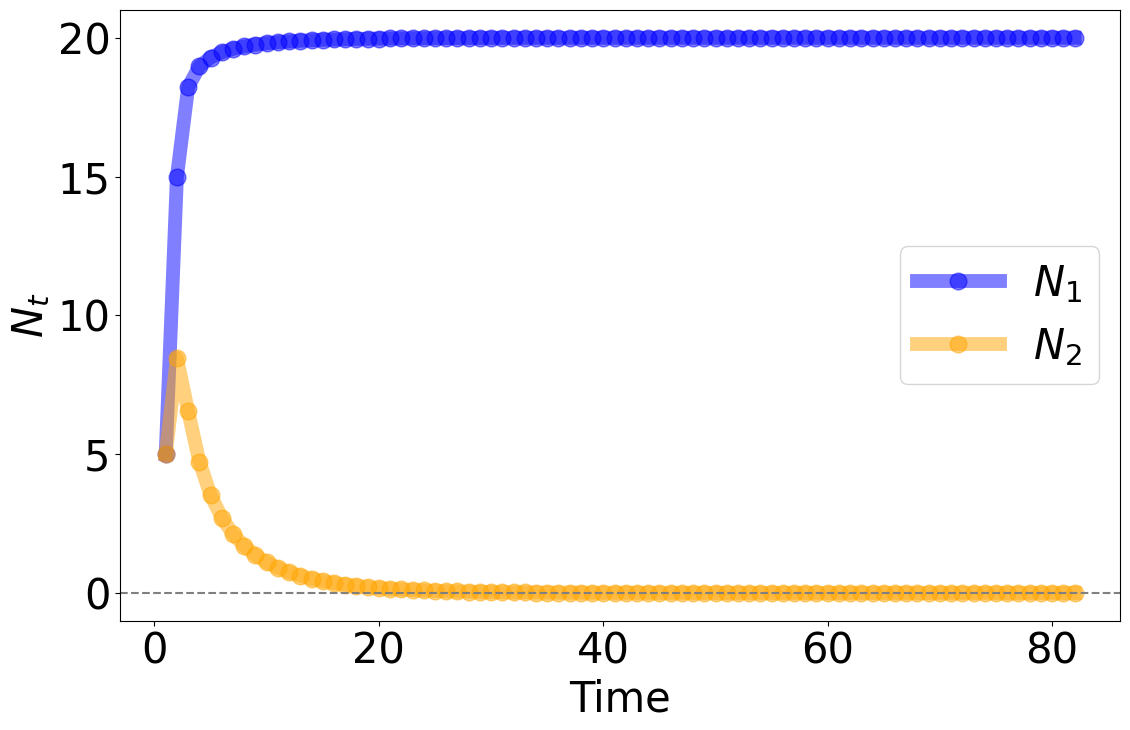

In [8]:
def main():
    # Initialize
    tmax = 2 # the code automatically adapts the tmax
    y1, y2 = np.zeros(tmax), np.zeros(tmax)
    y01, y02 = 5, 5 # initial conditions
    y1[0], y2[0] = y01, y02
    # Plot Two Species Dynamics
    plot_dynamics(y01, y02, r1, r2, a11, a12, a21, a22)

if __name__ == "__main__":
    main()